In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#### accuracy check for different patch size. 

In [22]:
path_metrics_p256_unet = 'model/trained/patch_256/unet_metrics_2.csv'
path_metrics_p512_unet = 'model/trained/patch_512/unet_metrics.csv'
path_metrics_p768_unet = 'model/trained/patch_768/unet_metrics.csv'
path_metrics_p1024_unet = 'model/trained/patch_1024/unet_metrics.csv'
path_metrics_p1280_unet = 'model/trained/patch_1280/unet_metrics.csv'
metrics_p256_unet_df = pd.read_csv(path_metrics_p256_unet)
metrics_p512_unet_df = pd.read_csv(path_metrics_p512_unet)
metrics_p768_unet_df = pd.read_csv(path_metrics_p768_unet)
metrics_p1024_unet_df = pd.read_csv(path_metrics_p1024_unet)
metrics_p1280_unet_df = pd.read_csv(path_metrics_p1280_unet)
metrics_df = [metrics_p256_unet_df, metrics_p512_unet_df, 
                metrics_p768_unet_df, metrics_p1024_unet_df, 
                metrics_p1280_unet_df
                ]
# metrics_p256_unet_df.tail(10)
# metrics_p512_unet_df.tail()
metrics_p1024_unet_df.tail(5)


,tra_loss,tra_miou,tra_oa,val_loss,val_miou,val_oa
195,0.029009,0.962498,0.983908,0.069431,0.878690,0.928896
196,0.029454,0.950113,0.975129,0.067311,0.880199,0.929924
197,0.028747,0.965076,0.982354,0.068973,0.880540,0.930559
198,0.035222,0.956070,0.979150,0.072327,0.871106,0.921841
199,0.028597,0.958597,0.980478,0.077572,0.872133,0.930046


In [3]:
path_metrics_p256_unet = 'model/trained/patch_256/unet_metrics.csv'
path_metrics_p512_unet = 'model/trained/patch_512/unet_resize256_metrics.csv'
path_metrics_p768_unet = 'model/trained/patch_768/unet_resize256_metrics.csv'
path_metrics_p1024_unet = 'model/trained/patch_1024/unet_resize256_metrics.csv'
path_metrics_p1280_unet = 'model/trained/patch_1280/unet_resize256_metrics.csv'
metrics_p256_unet_df = pd.read_csv(path_metrics_p256_unet)
metrics_p512_resize256_unet_df = pd.read_csv(path_metrics_p512_unet)
metrics_p768_resize256_unet_df = pd.read_csv(path_metrics_p768_unet)
metrics_p1024_resize256_unet_df = pd.read_csv(path_metrics_p1024_unet)
metrics_p1280_resize256_unet_df = pd.read_csv(path_metrics_p1280_unet)
metrics_resize256_df = [metrics_p256_unet_df, metrics_p512_resize256_unet_df, 
                metrics_p768_resize256_unet_df, metrics_p1024_resize256_unet_df, 
                metrics_p1280_resize256_unet_df
                ]
metrics_p256_unet_df.tail(10)
# metrics_p512_resize256_unet_df.tail()
# metrics_p1024_resize256_unet_df.tail(20)


,tra_loss,tra_miou,tra_oa,val_loss,val_miou,val_oa
190,0.037529,0.919655,0.945819,0.077854,0.852214,0.914290
191,0.032973,0.885927,0.927755,0.077081,0.853701,0.915439
192,0.048981,0.905882,0.960868,0.082205,0.845445,0.909620
193,0.040408,0.944351,0.971255,0.087974,0.842375,0.906766
194,0.044062,0.932124,0.960396,0.087991,0.842702,0.907696
195,0.053854,0.891195,0.926917,0.079125,0.855665,0.920277
196,0.056145,0.849217,0.890798,0.083814,0.846391,0.912814
197,0.046772,0.896319,0.947434,0.089528,0.842619,0.908678
198,0.027038,0.951333,0.981168,0.085626,0.844631,0.910643
199,0.047500,0.911167,0.945908,0.083638,0.846734,0.912950


In [4]:
colors = sns.color_palette("hls", 6)
labels = ['unet_256', 
            'unet_512',
            'unet_768',
            'unet_1024',
            'unet_1280',
          ]


Text(0.5, 1.0, 'Resize to 256')

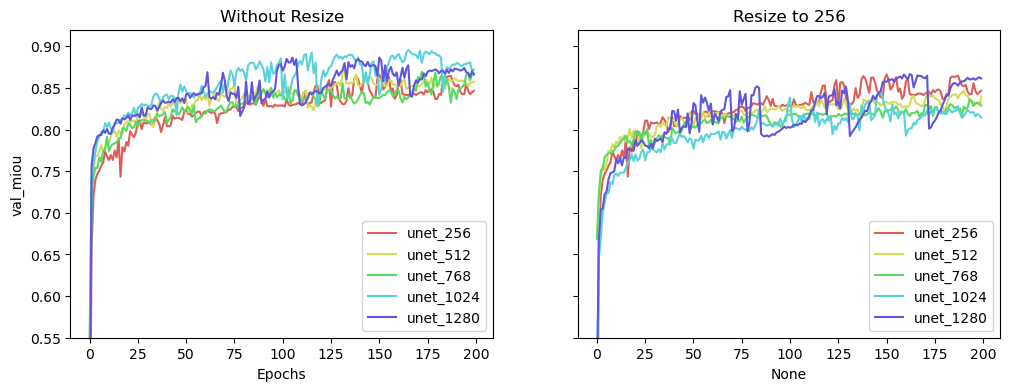

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12, 4), sharey=True)
for i, metric_df in enumerate(metrics_df):
    sns.lineplot(data=metric_df, 
                x=metric_df.index, 
                y='val_miou', 
                label=labels[i],
                color=colors[i],
                ax=ax[0])
for i, metric_df in enumerate(metrics_resize256_df):
    sns.lineplot(data=metric_df, 
                x=metric_df.index, 
                y='val_miou', 
                label=labels[i],
                color=colors[i],
                ax=ax[1])
ax[0].set_xlabel('Epochs')
ax[0].set_ylim(0.55, 0.92) 
ax[0].set_title('Without Resize')
ax[1].set_title('Resize to 256') 


Text(0.5, 1.0, 'Resize to 256')

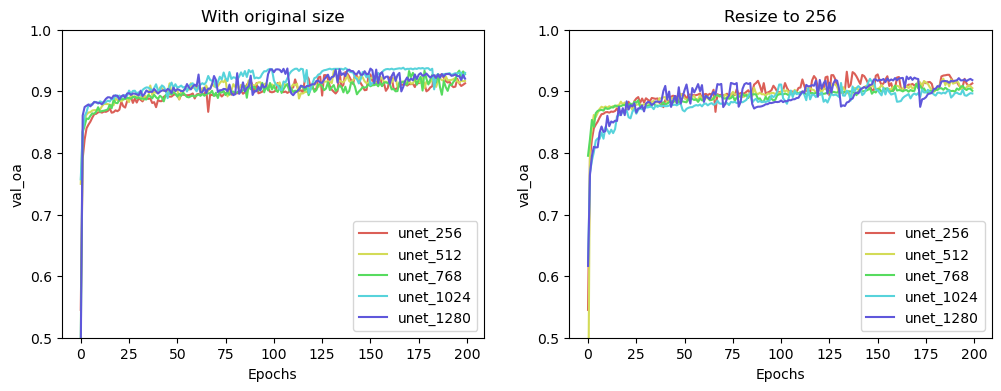

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
for i, metric_df in enumerate(metrics_df):
    sns.lineplot(data=metric_df, 
                x=metric_df.index, 
                y='val_oa', 
                label=labels[i],
                color=colors[i],
                ax=ax[0])
for i, metric_df in enumerate(metrics_resize256_df):
    sns.lineplot(data=metric_df, 
                x=metric_df.index, 
                y='val_oa', 
                label=labels[i],
                color=colors[i],
                ax=ax[1])
ax[0].set_xlabel('Epochs')
ax[0].set_ylim(0.5, 1)
ax[0].set_title('With original size')
ax[1].set_xlabel('Epochs')
ax[1].set_ylim(0.5, 1)
ax[1].set_title('Resize to 256') 
